<a href="https://colab.research.google.com/github/rakshith3101/deep-learning/blob/main/movie_recomendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NATURAL LANGUAGE PROCESSING**

This project is based on nlp which is the subset or the one particular applications of deep learning. Natural language processing is basically predicting output based on english text or english language based data.

In [1]:
#the data is imported from kaggle (https://www.kaggle.com) which is a open source platform that helps in working on machine learning and data science 
#datas
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! kaggle datasets download akshaypawar7/millions-of-movies

 98% 165M/168M [00:01<00:00, 169MB/s]
100% 168M/168M [00:01<00:00, 153MB/s]


In [3]:
! unzip millions-of-movies.zip -d millions-of-movies

Archive:  millions-of-movies.zip
  inflating: millions-of-movies/movies.csv  


In [4]:
import tensorflow as tf
import pandas as pd


reading the coma seperated values

In [5]:

df=pd.read_csv("/content/millions-of-movies/movies.csv")

In [6]:
df.head()
df.shape

(740706, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740706 entries, 0 to 740705
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    740706 non-null  int64  
 1   title                 740702 non-null  object 
 2   genres                521242 non-null  object 
 3   original_language     740706 non-null  object 
 4   overview              620316 non-null  object 
 5   popularity            740706 non-null  float64
 6   production_companies  343685 non-null  object 
 7   release_date          684852 non-null  object 
 8   budget                740706 non-null  float64
 9   revenue               740706 non-null  float64
 10  runtime               702836 non-null  float64
 11  status                740706 non-null  object 
 12  tagline               109555 non-null  object 
 13  vote_average          740706 non-null  float64
 14  vote_count            740706 non-null  float64
 15  

In [8]:
#check for null values in the data
df.isnull().sum()

id                           0
title                        4
genres                  219464
original_language            0
overview                120390
popularity                   0
production_companies    397021
release_date             55854
budget                       0
revenue                      0
runtime                  37870
status                       0
tagline                 631151
vote_average                 0
vote_count                   0
credits                 230418
keywords                526780
poster_path             197090
backdrop_path           516231
recommendations         699734
dtype: int64

In [9]:
#check for duplicated values
df.duplicated().sum()

131

In [10]:
#drop the duplicated values
df.drop_duplicates(inplace=True)

In [11]:
df[['title','release_date']].duplicated().sum()

80599

In [12]:
#it's good to drop the null valued column hence we clear out title and release_data which is not that efficient
df.drop_duplicates(subset=['title','release_date'],inplace=True)

In [13]:
#movies having value_count(rating) is only conisdered
df_=df[df.vote_count>=20].reset_index()

In [14]:
df_.fillna('',inplace=True)

In [15]:
#selecting the null vlaued genres and overview
selected=df_[(df_['genres']=='') & (df_['overview']=='')].index
selected.shape

(35,)

In [16]:
df_.drop(selected,inplace=True)


In [17]:
df_

,index,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,...,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,0,663712,Terrifier 2,Horror-Thriller,en,After being resurrected by a sinister entity A...,4620.725,Bloody Disgusting-Dark Age Cinema-Fuzz on the ...,2022-10-06,250000.0,...,138.0,Released,Who's Laughing Now?,7.440,134.0,Lauren LaVera-David Howard Thornton-Elliott Fu...,clown-halloween-resurrection-sequel-gore-slash...,/yw8NQyvbeNXoZO6v4SEXrgQ27Ll.jpg,/y5Z0WesTjvn59jP6yo459eUsbli.jpg,992016-882598-1026535-935999-800309-854513-102...
1,1,436270,Black Adam,Action-Science Fiction,en,Nearly 5000 years after he was bestowed with t...,3890.299,New Line Cinema-Flynn Picture Company-Seven Bu...,2022-10-19,200000000.0,...,125.0,Released,The world needed a hero. It got Black Adam.,7.112,555.0,Dwayne Johnson-Aldis Hodge-Pierce Brosnan-Noah...,anti hero-superhero-based on comic-dc extended...,/3zXceNTtyj5FLjwQXuPvLYK5YYL.jpg,/d6MhreFdMHONqX3iZlJGCF8UkIt.jpg,
2,2,960704,Fullmetal Alchemist: The Final Alchemy,Action-Adventure-Fantasy,ja,The Elric brothers’ long and winding journey c...,3411.702,Warner Bros. Japan-Oxybot-Square Enix,2022-06-24,0.0,...,143.0,Released,,6.400,97.0,Ryosuke Yamada-Atomu Mizuishi-Tsubasa Honda-Ka...,supernatural-based on manga-military-live acti...,/AeyiuQUUs78bPkz18FY3AzNFF8b.jpg,/5hoS3nEkGGXUfmnu39yw1k52JX5.jpg,1013228-760161-532639-960700-84773-642885-8779...
3,3,717728,Jeepers Creepers: Reborn,Horror-Thriller-Mystery,en,Forced to travel with her boyfriend to a horro...,3132.910,Screen Media Films-Black Hangar Studios-Orwo S...,2022-09-15,20000000.0,...,88.0,Released,Evil rides again.,5.799,358.0,Sydney Craven-Imran Adams-Jarreau Benjamin-Mat...,,/aGBuiirBIQ7o64FmJxO53eYDuro.jpg,/tIX6j3NzadlwGcJ52nuWdmtOQkg.jpg,760161-338947-10065-723419-901385-934207-10066...
4,4,759507,Blackout,Action-Adventure-Thriller,en,A man wakes in a hospital with no memory and q...,2482.238,Patriot Pictures-Itaca Films-Lost Winds Entert...,2022-10-12,0.0,...,81.0,Released,,5.700,50.0,Josh Duhamel-Abbie Cornish-Omar Chaparro-Nick ...,,/xDgnmbdWS59NtTPdzujdZGuPUPZ.jpg,/mjV9gpXO2R2SOYI4ChJZiu6F1OE.jpg,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43462,589266,182219,Serial Teachers,Comedy,fr,With only 12 percent of its pupils obtaining t...,0.600,UGC,2013-04-17,12000000.0,...,88.0,Released,,5.470,1109.0,Christian Clavier-Isabelle Nanty-Pierre-Franço...,high school-school teacher,/59Bi4wtdoxXV9eaPat7em2ahISI.jpg,/akVGOXzNCK9xYY63SvISvVcUWox.jpg,325844-252607-66129-344268-369776-262551-10332...
43463,590807,157919,Knife Fight,Drama,en,A political strategist juggling three clients ...,0.600,Divisadero Pictures,2013-01-25,7000000.0,...,99.0,Released,"When it comes to getting elected, there's no s...",5.300,28.0,Rob Lowe-Julie Bowen-Saffron Burrows-Jamie Chu...,,/tCwYgKwHNkbc3PuaaoOhoS2Uj6F.jpg,/An6oBoTRbPNdNDMuxTJ8GMuUujR.jpg,
43464,612786,184374,Cinco de Mayo: The Battle,War-History-Drama,es,On May 5th 1862 a few thousand Mexican soldier...,0.600,Estudios Churubusco Azteca-Gala Films-Gobierno...,2013-05-03,10000000.0,...,125.0,Released,,7.700,67.0,Christian Vázquez-Liz Gallardo-Angélica Aragón...,,/7MAtraeiaKnTrbtzUBbc9SHkdct.jpg,,
43465,701428,510819,Dirty Dead Con Men,Action-Crime-Drama,en,A cool and dangerous neo-noir crime film that ...,0.600,Rock n' Tape Films-Thunder Alley Productions-N...,2018-03-30,0.0,...,85.0,Released,In a world full of criminals...what difference...,4.000,20.0,Peter Dobson-Kevin Interdonato-Louis Mandylor-...,neo-noir,/r70GGoZ5PqqokDDRnVfTN7PPDtJ.jpg,/75RJi3yVZnZtVj4Kn1bYGzkhiEx.jpg,383498-401981-337167-284054-299536


In [18]:
#picking up the selceted row to build our data
df_['genres']=df_['genres'].apply(lambda x:' '.join(x.split('-')))
df_['keywords']=df_['keywords'].apply(lambda x:' '.join(x.split('-')))
df_['credits']=df_['credits'].apply(lambda x:' '.join(x.replace(' ','').split('-')[:5]))

In [19]:
#tag generally contains the {overview , genres, keywords, credits and language} we can also include other criteria for our tag
# these many factor does good for our model
df_['tag']=df_['overview']+' '+df_['genres']+' '+df_['keywords']+' '+df_['credits']+' '+df_['original_language']

In [20]:
df_.tag[1]

'Nearly 5000 years after he was bestowed with the almighty powers of the Egyptian gods—and imprisoned just as quickly—Black Adam is freed from his earthly tomb ready to unleash his unique form of justice on the modern world. Action Science Fiction anti hero superhero based on comic dc extended universe DwayneJohnson AldisHodge PierceBrosnan NoahCentineo SarahShahi en'

In [21]:
df_['tag']=df_['tag'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**checkpoint**

In [22]:
# term frequency and inverse document frequency (https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [23]:
tfidf=TfidfVectorizer(stop_words='english')

In [24]:
#fit the created tag into the tfidf_vector creatd in the above cell
tfidf_vector=tfidf.fit_transform(df_['tag'])

In [25]:
#this are numerical values provided by the tf idf vector
print(tfidf_vector)

  (0, 42350)	0.02625729598573495
  (0, 22828)	0.19547975570621104
  (0, 121379)	0.18826498563814334
  (0, 41507)	0.19547975570621104
  (0, 33530)	0.18826498563814334
  (0, 79418)	0.19547975570621104
  (0, 144872)	0.09891006250241399
  (0, 54228)	0.12918546580530832
  (0, 39360)	0.09730323394550819
  (0, 76021)	0.1555094659631486
  (0, 128151)	0.10332612427058607
  (0, 53795)	0.10550986640197964
  (0, 124675)	0.08749932923094449
  (0, 115975)	0.1349594875645189
  (0, 137401)	0.04697595022825252
  (0, 59959)	0.05237519023930712
  (0, 63117)	0.12147737033101376
  (0, 44440)	0.16103902000452566
  (0, 10863)	0.09104258751914414
  (0, 98712)	0.10273458572884306
  (0, 140572)	0.07323531412470531
  (0, 141855)	0.1413060946044332
  (0, 5621)	0.1021151937124935
  (0, 130900)	0.09906718327958593
  (0, 46861)	0.0781278330113507
  :	:
  (43431, 111575)	0.17538187345307404
  (43431, 128868)	0.18034097856437253
  (43431, 29808)	0.14587813433445748
  (43431, 58122)	0.1281848311485793
  (43431, 102221)

In [26]:
df_.tag[0]

'After being resurrected by a sinister entity Art the Clown returns to Miles County where he must hunt down and destroy a teenage girl and her younger brother on Halloween night  As the body count rises the siblings fight to stay alive while uncovering the true nature of Arts evil intent Horror Thriller clown halloween resurrection sequel gore slasher killer killer clown duringcreditsstinger evil clown halloween night graphic violence LaurenLaVera DavidHowardThornton ElliottFullam SamanthaScaffidi CaseyHartnett en'

In [27]:
from skimage import io

In [28]:
import matplotlib.pyplot as plt

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
df_

,index,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,tag
0,0,663712,Terrifier 2,Horror Thriller,en,After being resurrected by a sinister entity A...,4620.725,Bloody Disgusting-Dark Age Cinema-Fuzz on the ...,2022-10-06,250000.0,...,Released,Who's Laughing Now?,7.440,134.0,LaurenLaVera DavidHowardThornton ElliottFullam...,clown halloween resurrection sequel gore slash...,/yw8NQyvbeNXoZO6v4SEXrgQ27Ll.jpg,/y5Z0WesTjvn59jP6yo459eUsbli.jpg,992016-882598-1026535-935999-800309-854513-102...,After being resurrected by a sinister entity A...
1,1,436270,Black Adam,Action Science Fiction,en,Nearly 5000 years after he was bestowed with t...,3890.299,New Line Cinema-Flynn Picture Company-Seven Bu...,2022-10-19,200000000.0,...,Released,The world needed a hero. It got Black Adam.,7.112,555.0,DwayneJohnson AldisHodge PierceBrosnan NoahCen...,anti hero superhero based on comic dc extended...,/3zXceNTtyj5FLjwQXuPvLYK5YYL.jpg,/d6MhreFdMHONqX3iZlJGCF8UkIt.jpg,,Nearly 5000 years after he was bestowed with t...
2,2,960704,Fullmetal Alchemist: The Final Alchemy,Action Adventure Fantasy,ja,The Elric brothers’ long and winding journey c...,3411.702,Warner Bros. Japan-Oxybot-Square Enix,2022-06-24,0.0,...,Released,,6.400,97.0,RyosukeYamada AtomuMizuishi TsubasaHonda Kanat...,supernatural based on manga military live acti...,/AeyiuQUUs78bPkz18FY3AzNFF8b.jpg,/5hoS3nEkGGXUfmnu39yw1k52JX5.jpg,1013228-760161-532639-960700-84773-642885-8779...,The Elric brothers long and winding journey co...
3,3,717728,Jeepers Creepers: Reborn,Horror Thriller Mystery,en,Forced to travel with her boyfriend to a horro...,3132.910,Screen Media Films-Black Hangar Studios-Orwo S...,2022-09-15,20000000.0,...,Released,Evil rides again.,5.799,358.0,SydneyCraven ImranAdams JarreauBenjamin MattBa...,,/aGBuiirBIQ7o64FmJxO53eYDuro.jpg,/tIX6j3NzadlwGcJ52nuWdmtOQkg.jpg,760161-338947-10065-723419-901385-934207-10066...,Forced to travel with her boyfriend to a horro...
4,4,759507,Blackout,Action Adventure Thriller,en,A man wakes in a hospital with no memory and q...,2482.238,Patriot Pictures-Itaca Films-Lost Winds Entert...,2022-10-12,0.0,...,Released,,5.700,50.0,JoshDuhamel AbbieCornish OmarChaparro NickNolt...,,/xDgnmbdWS59NtTPdzujdZGuPUPZ.jpg,/mjV9gpXO2R2SOYI4ChJZiu6F1OE.jpg,,A man wakes in a hospital with no memory and q...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43462,589266,182219,Serial Teachers,Comedy,fr,With only 12 percent of its pupils obtaining t...,0.600,UGC,2013-04-17,12000000.0,...,Released,,5.470,1109.0,ChristianClavier IsabelleNanty Pierre François...,high school school teacher,/59Bi4wtdoxXV9eaPat7em2ahISI.jpg,/akVGOXzNCK9xYY63SvISvVcUWox.jpg,325844-252607-66129-344268-369776-262551-10332...,With only 12 percent of its pupils obtaining t...
43463,590807,157919,Knife Fight,Drama,en,A political strategist juggling three clients ...,0.600,Divisadero Pictures,2013-01-25,7000000.0,...,Released,"When it comes to getting elected, there's no s...",5.300,28.0,RobLowe JulieBowen SaffronBurrows JamieChung D...,,/tCwYgKwHNkbc3PuaaoOhoS2Uj6F.jpg,/An6oBoTRbPNdNDMuxTJ8GMuUujR.jpg,,A political strategist juggling three clients ...
43464,612786,184374,Cinco de Mayo: The Battle,War History Drama,es,On May 5th 1862 a few thousand Mexican soldier...,0.600,Estudios Churubusco Azteca-Gala Films-Gobierno...,2013-05-03,10000000.0,...,Released,,7.700,67.0,ChristianVázquez LizGallardo AngélicaAragón Ku...,,/7MAtraeiaKnTrbtzUBbc9SHkdct.jpg,,,On May 5th 1862 a few thousand Mexican soldier...
43465,701428,510819,Dirty Dead Con Men,Action Crime Drama,en,A cool and dangerous neo-noir crime film that ...,0.600,Rock n' Tape Films-Thunder Alley Productions-N...,2018-03-30,0.0,...,Released,In a world full of criminals...what difference...,4.000,20.0,PeterDobson KevinInterdonato LouisMandylor Chr...,neo noir,/r70

In [31]:
# this is the method for creating the recomendation by using the cousine similarities
# which usually returns the vartiations in the ground value(true value) and the predicted values
# this usually provides the 10 movie recomendations based on the input provied by the user
def recom(title):
    id=df_.index[df_['title']==title][0]
    try:
        img=io.imread(f'https://image.tmdb.org/t/p/w500/{df_.loc[id,"poster_path"]}')
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass

    print("RECOMENDATIONS")
    rnd=list(enumerate(cosine_similarity(tfidf_vector,tfidf_vector[id])))
    rnd=sorted(rnd,key=lambda x:x[1],reverse=True)
    rnd=rnd[1:12]
    movie_indices=[i[0] for i in rnd]
    result=df_.iloc[movie_indices]

    fig,ax=plt.subplots(4,3,figsize=(8,8))
    ax=ax.flatten()
    for i,j in enumerate(result.poster_path):

        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title,)
            
            img=io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(img)
        except:pass
        #ax[i].text(size=12,ha='centre',text='hey')
    fig.tight_layout()
    fig.show()



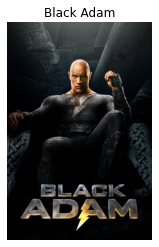

RECOMENDATIONS


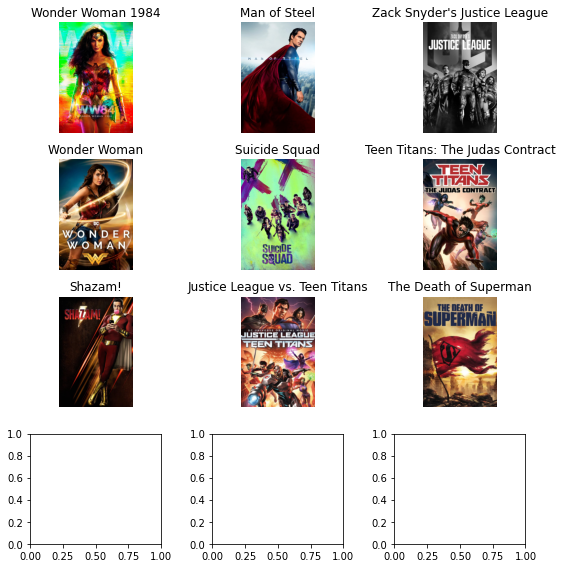

In [32]:
recom("Black Adam")